In [31]:
# Importing 
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [32]:
#creating path
path= r'C:\Users\13472\Documents\Task 6'

In [33]:
#Importing dataset
df = pd.read_csv(os.path.join(path,'02. Prepared Data','df_cacao_cleaned.csv' ),index_col = False)

In [34]:
df.head()

,Unnamed: 0,Company_Name,Bar Origin,Ref,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [35]:
df.shape

(1795, 9)

In [36]:
df.columns

Index(['Unnamed: 0', 'Company_Name', ' Bar Origin', 'Ref', 'Review_Date',
       'Cocoa_Percentage', ' Company_Location', 'Rating', 'Bean_Origin'],
      dtype='object')

# Subsetting, Wrangling, and Cleaning Time Series Data

In [37]:
# Creating a dataframe for Review Date and Rating
df_sub = df[['Review_Date','Rating']]


In [38]:
df_sub.columns

Index(['Review_Date', 'Rating'], dtype='object')

In [73]:
# Creating a new dataframe 
df_sub1=df_sub.set_index('Review_Date')
df_sub1.index = pd.to_datetime(df_sub1.index, format='%Y')
df_sub1.head()

,Rating
Review_Date,
2016-01-01,3.75
2015-01-01,2.75
2015-01-01,3.00
2015-01-01,3.50
2015-01-01,3.50


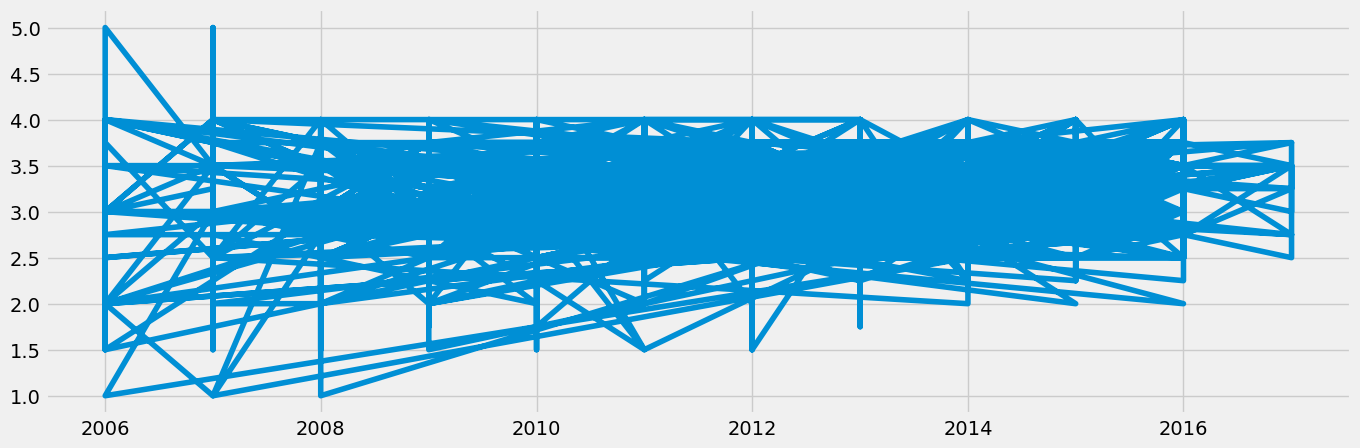

In [75]:
# Plotting the data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub1)

In [42]:
# Checking for missing values
df_1.isnull().sum()

M_Rating    0
dtype: int64

In [43]:
# Checking for duplicates
dups = df_1.duplicated()
dups.sum()

7

# Time series analysis: Decomposition

In [76]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub1, model='additive', period=1)

In [77]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

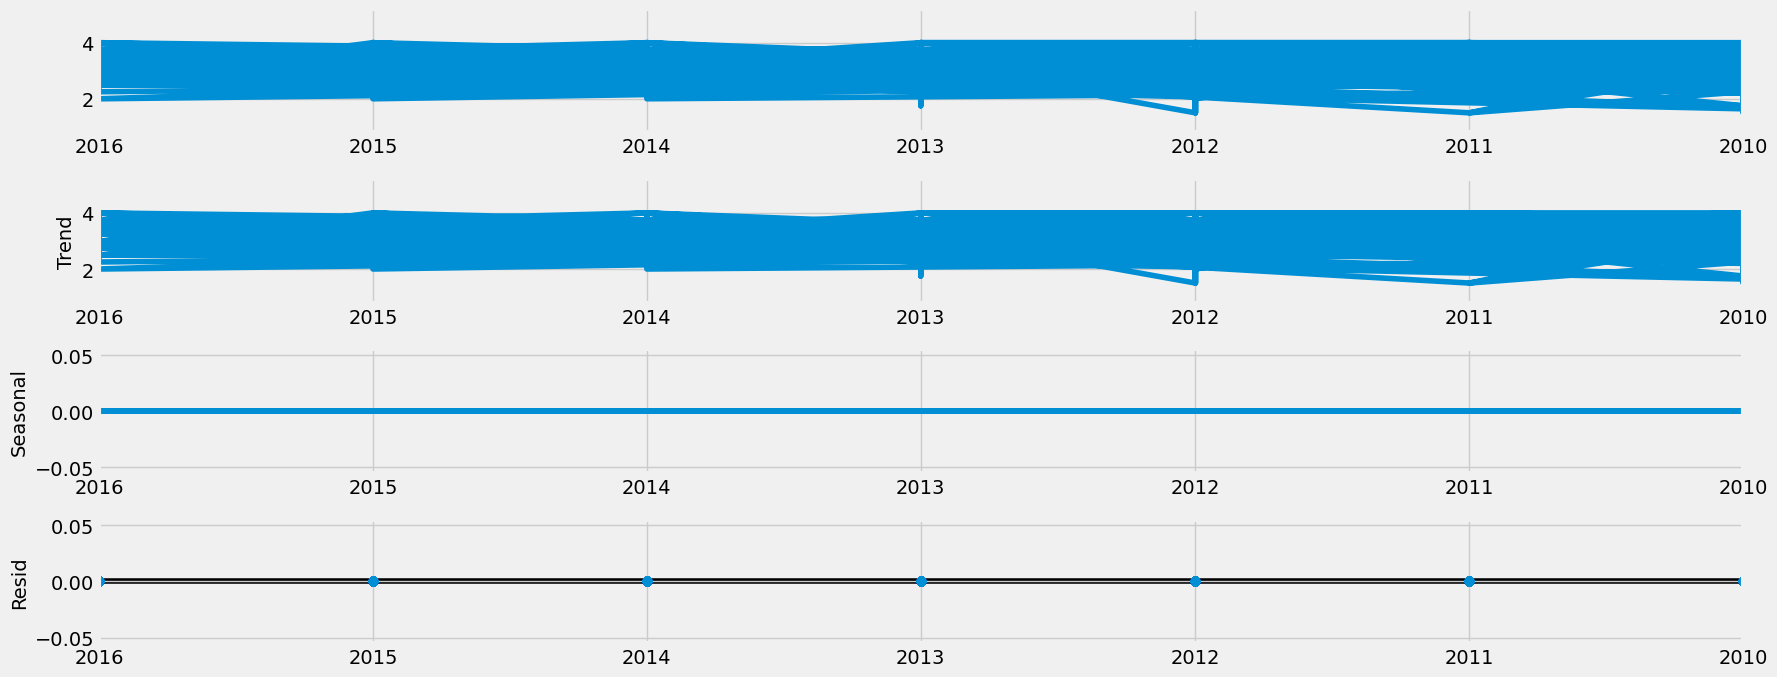

In [78]:
# Plot the separate components

decomposition.plot()
plt.show()

# Testing for stationarity

In [52]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Applying the test using the function on the time series
dickey_fuller(df_1 ['M_Rating'])

Dickey-Fuller Stationarity test:
Test Statistic                 1.178477
p-value                        0.995834
Number of Lags Used            3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


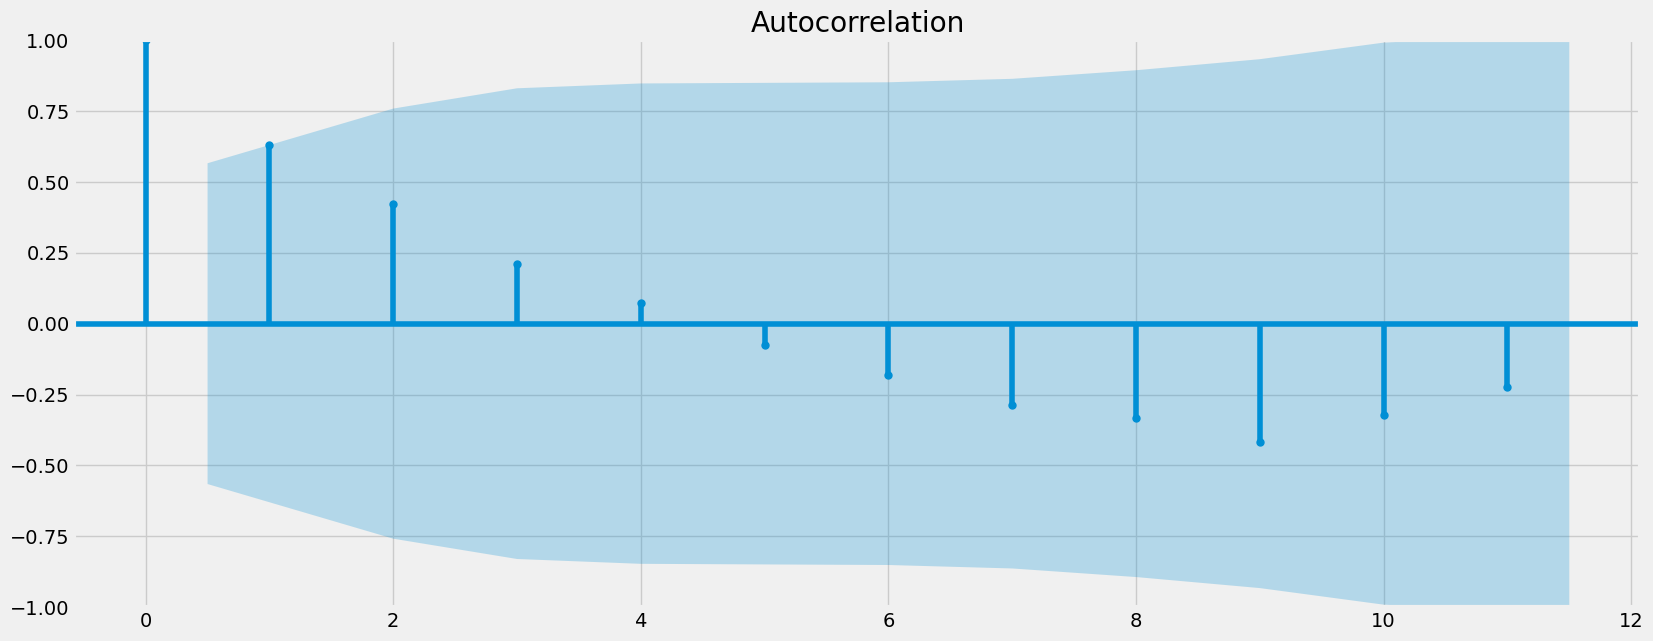

In [53]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_1)
plt.show()

# Stationarizing Data

In [54]:
data_diff = df_1 - df_1.shift(1)

In [55]:
data_diff.dropna(inplace = True)

In [56]:
data_diff.head()

,M_Rating
Review_Date,
2007-01-01,0.0
2008-01-01,0.0
2009-01-01,0.5
2010-01-01,0.0
2011-01-01,0.0


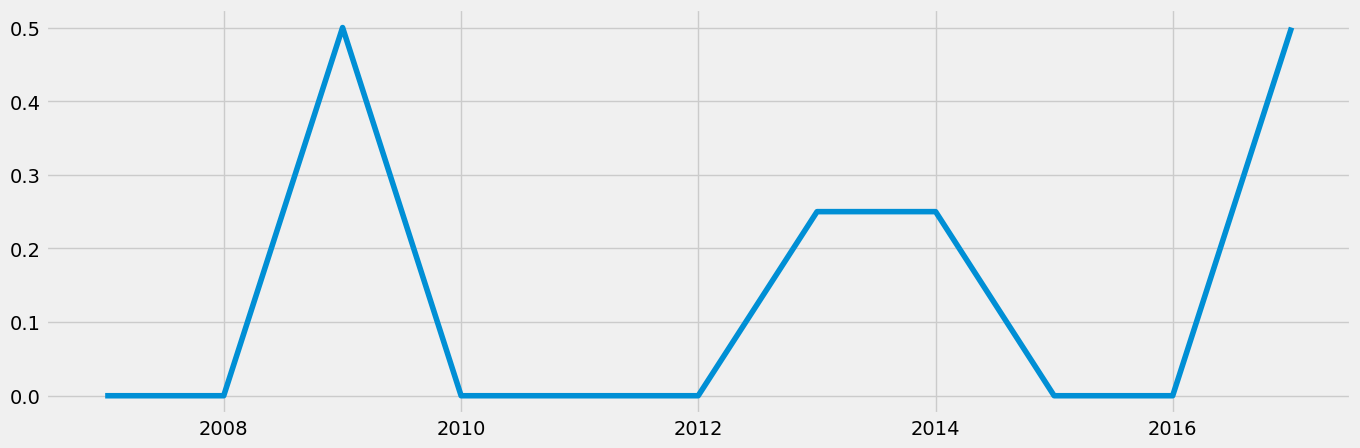

In [57]:
# Checking the time series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [58]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -3.295018
p-value                        0.015103
Number of Lags Used            2.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [59]:
data_diff2 = data_diff - data_diff.shift(1)

In [60]:
data_diff2.dropna(inplace = True)

In [61]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -3.139402
p-value                        0.023771
Number of Lags Used            2.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


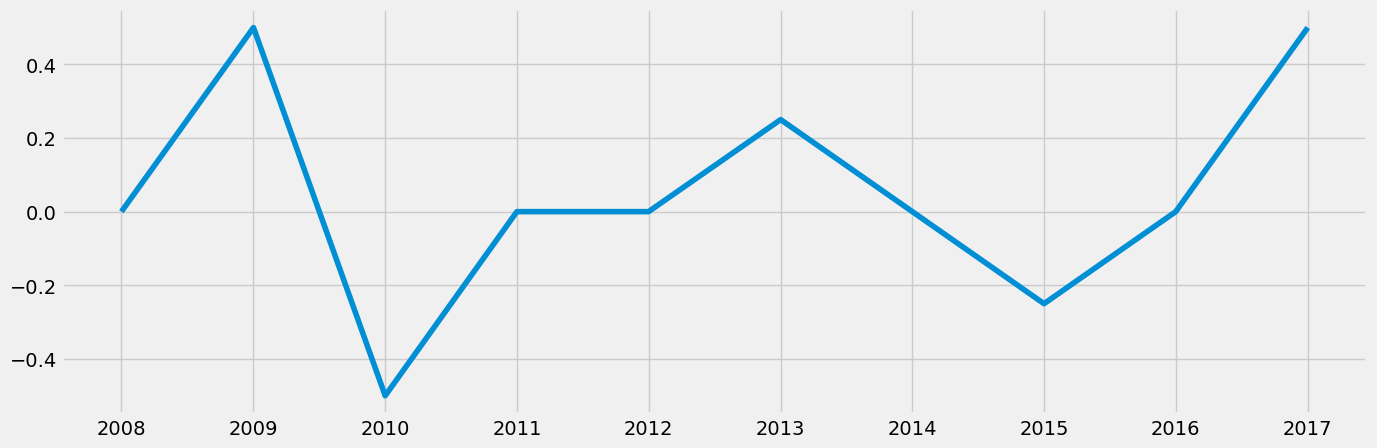

In [62]:
# Checking the time series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)